In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)
# Set seed for reproducibility
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Load your dataset
data = pd.read_csv('augmented_dataset.csv')

X = data.drop('Grade', axis=1)  # Features
y = data['Grade'] 

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train to one-hot encoded format
num_classes = len(np.unique(y))
y_train_encoded = to_categorical(y_train-1, num_classes=num_classes)
y_test_encoded = to_categorical(y_test-1, num_classes=num_classes)

# Define the model creation function
def create_model(layers=[128, 64, 32], dropout_rate=0.5):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(layers[0], activation='relu', input_shape=(23,)))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    for units in layers[1:]:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameters for manual tuning
epochs_list =[50,60]
layer_combinations =[[64,128,32],[64],[128,32],[512, 256, 128, 64],[64,64]]
dropout_rates = [0.3,0.5]
best_accuracy = 0
best_model = None
best_parameters = None
# Define KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=seed_value)
# Perform manual parameter tuning and cross-validation
for epochs in epochs_list:
    for layers in layer_combinations:
        for dropout_rate in dropout_rates:
            print(f"Evaluating model with epochs={epochs}, layers={layers}, dropout_rate={dropout_rate}")
            accuracy_values = []
            for train_index, val_index in kfold.split(X_train_scaled):
                X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
                y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]
                # Create the model
                model = create_model(layers=layers, dropout_rate=dropout_rate)
                # Fit the model
                history = model.fit(X_train_scaled, y_train_encoded, 
                           epochs=epochs, 
                           validation_data=(X_val_fold, y_val_fold),verbose=0 ) 
                # Evaluate the model on validation set
                _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
                accuracy_values.append(accuracy)
            
            mean_accuracy = np.mean(accuracy_values)
            print(f"Mean Accuracy: {mean_accuracy}")
            
            # Update best model if the current model is better
            if mean_accuracy > best_accuracy:
                best_accuracy = mean_accuracy
                best_model=model
                best_history=history
                
                best_parameters = {'epochs': epochs, 'layers': layers, 'dropout_rate': dropout_rate}
               
best_model.save('my_ann_model.h5')
  
  

Evaluating model with epochs=50, layers=[64, 128, 32], dropout_rate=0.3


c:\Users\keerthana ganesan\OneDrive\Desktop\project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Accuracy: 0.9730395078659058
Evaluating model with epochs=50, layers=[64, 128, 32], dropout_rate=0.5
Mean Accuracy: 0.8011550188064576
Evaluating model with epochs=50, layers=[64], dropout_rate=0.3
Mean Accuracy: 0.8934751629829407
Evaluating model with epochs=50, layers=[64], dropout_rate=0.5
Mean Accuracy: 0.8636474013328552
Evaluating model with epochs=50, layers=[128, 32], dropout_rate=0.3
Mean Accuracy: 0.9758763909339905
Evaluating model with epochs=50, layers=[128, 32], dropout_rate=0.5
Mean Accuracy: 0.909148919582367
Evaluating model with epochs=50, layers=[512, 256, 128, 64], dropout_rate=0.3
Mean Accuracy: 0.9943262338638306
Evaluating model with epochs=50, layers=[512, 256, 128, 64], dropout_rate=0.5
Mean Accuracy: 0.9815602779388428
Evaluating model with epochs=50, layers=[64, 64], dropout_rate=0.3
Mean Accuracy: 0.9616919994354248
Evaluating model with epochs=50, layers=[64, 64], dropout_rate=0.5
Mean Accuracy: 0.8651165127754211
Evaluating model with epochs=60, laye

Mean Accuracy: 0.9034346461296081


In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)

# Set seed for reproducibility
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Load your dataset
data = pd.read_csv('augmented_dataset.csv')

X = data.drop('Grade', axis=1)  # Features
y = data['Grade'] 

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train to one-hot encoded format
num_classes = len(np.unique(y))
y_train_encoded = to_categorical(y_train-1, num_classes=num_classes)
y_test_encoded = to_categorical(y_test-1, num_classes=num_classes)
# Fit the best model on the entire training set
loaded_model = tf.keras.models.load_model('my_ann_model.h5')
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
# Evaluate the best model on the test set
y_pred = loaded_model.predict(X_test_scaled)
y_pred_c=[]

y_pred_classes = np.argmax(y_pred, axis=1)
for y in y_pred_classes:
    y_pred_c.append(y+1)

y_pred_classes=y_pred_c    

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
F1 = f1_score(y_test, y_pred_classes, average='macro')

# Print evaluation metrics and best parameters
print("Best Parameters:", best_parameters)
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", F1)




6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Best Parameters: {'epochs': 60, 'layers': [512, 256, 128, 64], 'dropout_rate': 0.3}
Test Accuracy: 0.9431818181818182
Precision: 0.949530349391589
Recall: 0.9390243902439024
F1 score: 0.9388565169936527


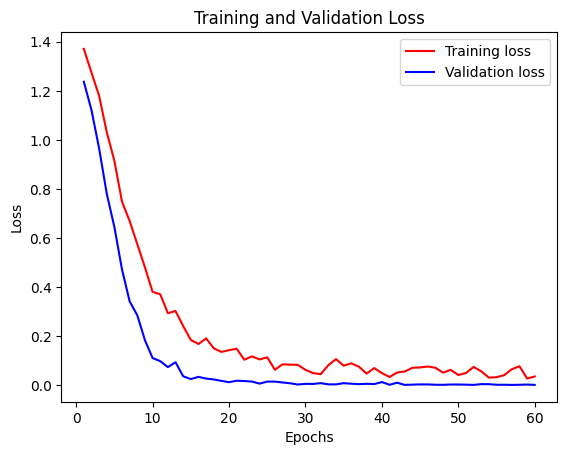

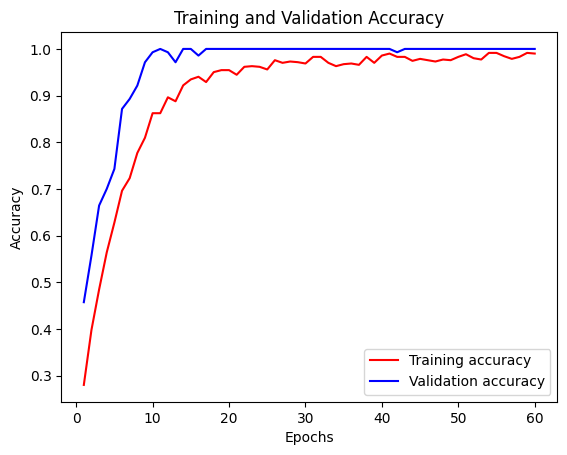

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Best Parameters: None
Test Accuracy: 0.9431818181818182
Precision: 0.949530349391589
Recall: 0.9390243902439024


In [35]:


# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = best_history.history['loss']
val_loss = best_history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = best_history.history['accuracy']
val_acc = best_history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



y_pred = loaded_model.predict(X_test_scaled)
y_pred_c=[]

y_pred_classes = np.argmax(y_pred, axis=1)
for y in y_pred_classes:
    y_pred_c.append(y+1)

y_pred_classes=y_pred_c    

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')

# Print evaluation metrics and best parameters
print("Best Parameters:", best_parameters)
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


In [58]:
import numpy as np

from sklearn.metrics import mean_squared_error
np.random.seed(42)
# Specify the target value for which you want to calculate the error
target_value = 3#Change this to your desired target value
data = pd.read_csv('augmented_dataset.csv')

X = data.drop('Grade', axis=1)

# Calculate the baseline error for the specified target value
baseline_predictions = loaded_model.predict(X_test_scaled)
baseline_error = mean_squared_error(y_test_encoded[:, target_value], baseline_predictions[:, target_value])

# Calculate the impact of each feature on error for the specified target value
feature_errors = {}
for feature in X.columns:
    # Perturb the feature by adding random noise
    X_test_perturbed = X_test_scaled.copy()
    perturbation = np.random.normal(loc=0.0, scale=0.1, size=X_test_perturbed.shape[0])  # Adjust the scale as needed
    feature_index = X.columns.get_loc(feature)
    X_test_perturbed[:, feature_index] += perturbation
    
    # Calculate the error with the perturbed feature for the specified target value
    perturbed_predictions = loaded_model.predict(X_test_perturbed)
    perturbed_error = mean_squared_error(y_test_encoded[:, target_value], perturbed_predictions[:, target_value])
    
    # Store the difference in error
    feature_errors[feature] = perturbed_error - baseline_error

# Sort the features by their impact on error
sorted_features = sorted(feature_errors.items(), key=lambda x: x[1], reverse=True)
feature_mean_values={}
feature_median_values={}
# Print the impact of each feature on error
for feature, error_impact in sorted_features:
    target_value_data =data[(data['Grade']-1)== target_value]
    mean_value = np.mean(target_value_data[feature])
    feature_mean_values[feature] = mean_value
    median_value = np.median(target_value_data[feature])
    feature_median_values[feature] = median_value
    print(f"Feature '{feature}' - Mean Value: {mean_value:.4f}, Median value: {median_value} ,Error Impact: {error_impact:.6f}")
    


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Feature 'COMPLETING ASSIGNMENTS' - Mean Value: 36.8955, Median value: 31.5 ,Error Impact

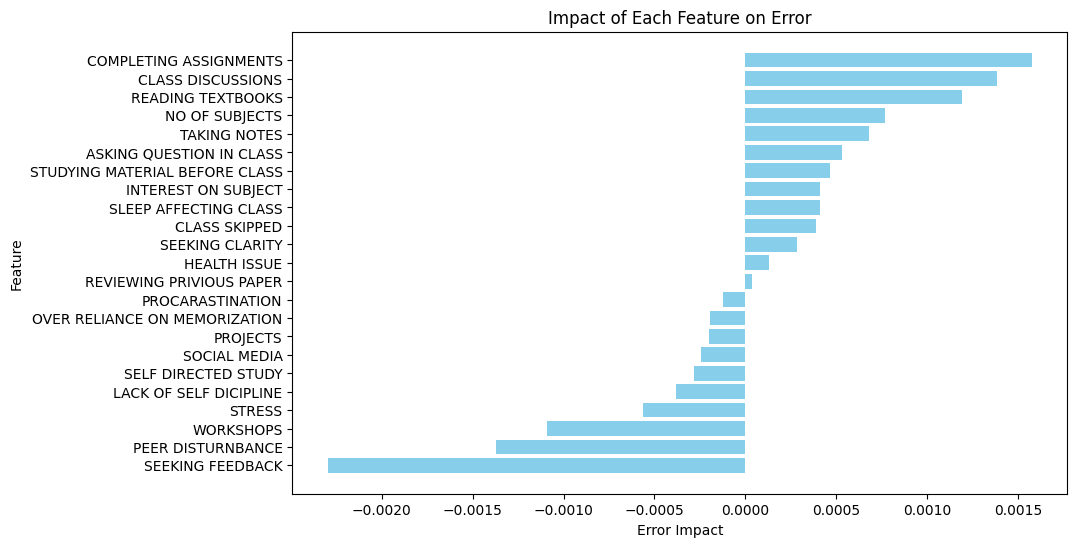

In [59]:
import matplotlib.pyplot as plt

# Convert the feature errors dictionary to two lists: features and error impacts
features = [feat for feat, _ in sorted_features]
error_impacts = [error_impact for _, error_impact in sorted_features]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(features, error_impacts, color='skyblue')
plt.xlabel('Error Impact')
plt.ylabel('Feature')
plt.title('Impact of Each Feature on Error')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest impact at the top
plt.show()

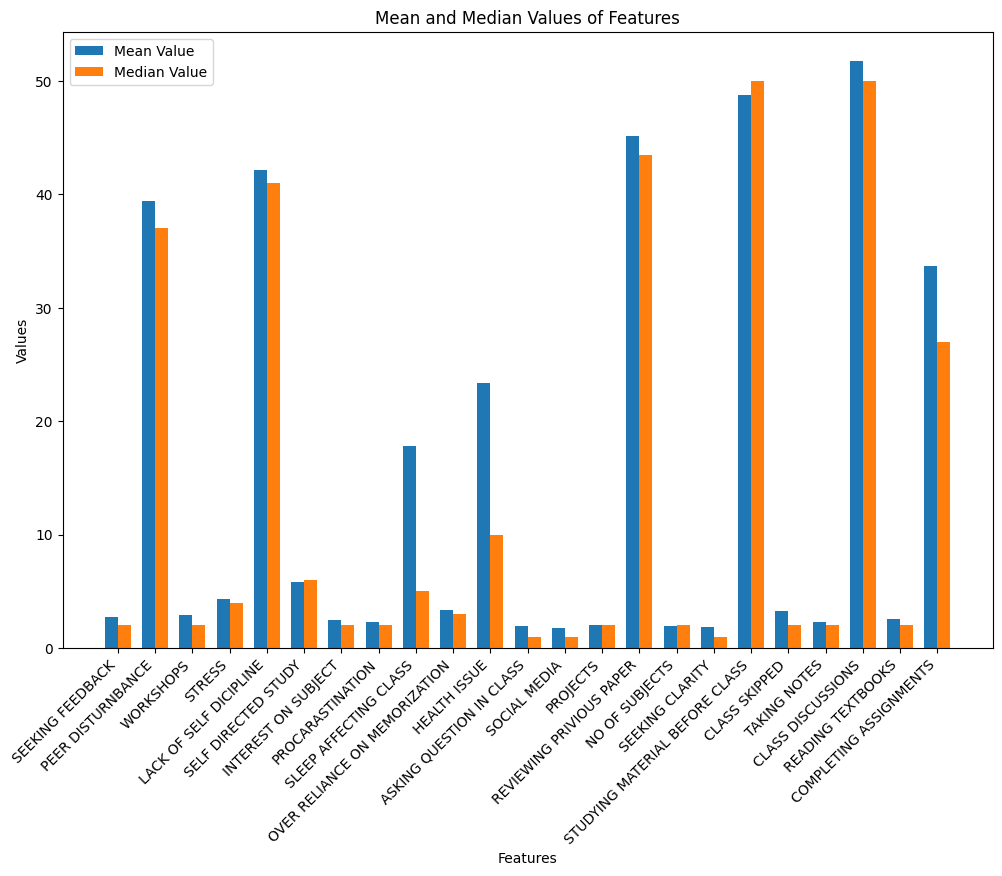

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming sorted_features is a list of tuples containing feature names and error impacts
features = []
mean_values = []
median_values = []
error_impacts = []

for feature, error_impact in sorted_features:
    mean_value = np.mean(X[feature])
    median_value = np.median(X[feature])
    
    features.append(feature)
    mean_values.append(mean_value)
    median_values.append(median_value)
    

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(len(features))
bar_width = 0.35

bar1 = ax.bar(index, mean_values, bar_width, label='Mean Value')
bar2 = ax.bar(index + bar_width, median_values, bar_width, label='Median Value')
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Mean and Median Values of Features')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(features, rotation=45, ha='right')
ax.legend()

In [155]:
from joblib import load

# Load SVM model
svm_model = load('svm_model.joblib')

# Load KNN model
knn_model = load('knn_model.joblib')

import xgboost as xgb

# Load XGBoost model
xgb_model = xgb.Booster(model_file='xgboost_model.json')
X_test=X_test_scaled
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Model Accuracy:", svm_accuracy)

# Evaluate KNN model
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Model Accuracy:", knn_accuracy)
from sklearn.preprocessing import LabelEncoder
xgb_predictions = xgb_model.predict(xgb.DMatrix(X_test))
max_col_indices = np.argmax(xgb_predictions, axis=1)
t=[]
for m in max_col_indices:
    t.append(m+1)
xgb_accuracy = accuracy_score(y_test, t)
print("XGBoost Model Accuracy:", xgb_accuracy)

SVM Model Accuracy: 0.9261363636363636
KNN Model Accuracy: 0.9147727272727273
XGBoost Model Accuracy: 0.9090909090909091


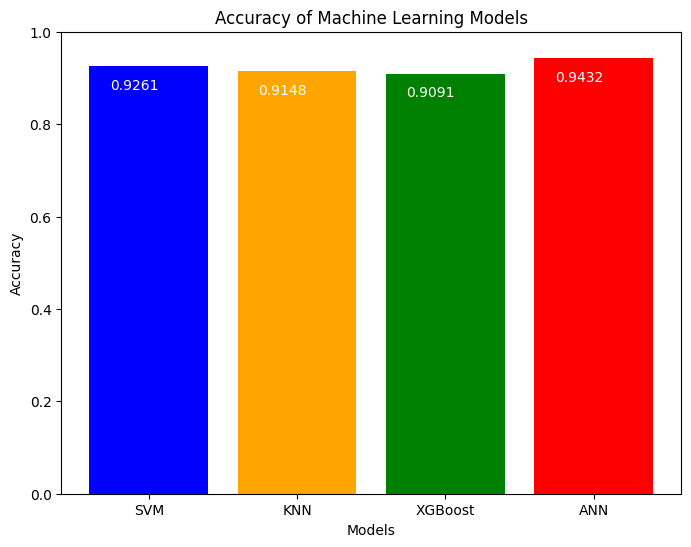

In [156]:

import matplotlib.pyplot as plt

# Model names
models = ['SVM', 'KNN', 'XGBoost','ANN']

# Model accuracies
accuracies = [svm_accuracy, knn_accuracy, xgb_accuracy,accuracy]

# Plotting the bar plot
plt.figure(figsize=(8, 6))
bars=plt.bar(models, accuracies, color=['blue', 'orange', 'green','red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Models')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1 for accuracy scale
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() - 0.05, f'{acc:.4f}', ha='center', color='white')

plt.show()
